## **Exploratory Data Analysis & Visualization**

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

### **Orders Data**

#### **Import and prepare data**

In [17]:
com_data = pd.read_csv('orders_comp (1).csv')
com_data

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,other,other
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other


In [18]:
com_data.dtypes

order_id         int64
sku             object
qty              int64
unit_price     float64
total_price    float64
price          float64
name            object
order_date      object
brand           object
desc            object
in_stock         int64
price_diff     float64
disc_perc      float64
category        object
subcategory     object
dtype: object

In [19]:
# Convert order_date to datetime objects.

com_data['date'] = pd.to_datetime(com_data.order_date, format='%d/%m/%Y %H:%M')
com_data

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other,2017-01-01 01:51:00
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other,2017-01-01 01:57:00
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other,2017-01-01 02:02:00
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other,2017-01-02 10:00:00
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other,2017-01-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,other,other,2018-03-14 11:56:00
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:50:00
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:51:00
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:58:00


In [20]:
com_data.dtypes

order_id                int64
sku                    object
qty                     int64
unit_price            float64
total_price           float64
price                 float64
name                   object
order_date             object
brand                  object
desc                   object
in_stock                int64
price_diff            float64
disc_perc             float64
category               object
subcategory            object
date           datetime64[ns]
dtype: object

#### **extract datetime data and convert datatype**

In [21]:
com_data = com_data.assign(year = com_data['date'].dt.strftime('%Y'),
                           month = com_data['date'].dt.strftime('%m'))
com_data.sample(20)

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month
44577,466862,APP2256,1,1199.00,1199.00,1279.00,"Apple MacBook Air 13 ""Core i7 22GHz | 8GB RAM ...",19/12/2017 15:29,Apple,laptop MacBook Air 13 inch i7 22GHz 8GB RAM an...,0,80.00,6.254887,macbooks,other,2017-12-19 15:29:00,2017,12
42894,461237,LGE0044,1,578.99,578.99,599.00,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",12/12/2017 23:17,LG,99% Professional Monitor sRGB color calibrator...,1,20.01,3.340568,other,other,2017-12-12 23:17:00,2017,12
48527,479178,LOG0214,1,123.49,123.49,139.00,"Create Logitech Keyboard Case iPad Pro 97 ""Black",02/01/2018 09:16,Logitech,Cover with backlit keyboard penholder and smar...,1,15.51,11.158273,other,other,2018-01-02 09:16:00,2018,01
35575,435983,LAC0185,1,166.14,166.14,204.99,2TB LaCie Rugged USB 3.0 Thunderbolt,24/11/2017 17:35,LaCie,Wireless Portable Hard Thunderbolt and USB 3.0...,1,38.85,18.952144,other,other,2017-11-24 17:35:00,2017,11
34360,431885,TUC0350,1,11.99,11.99,12.90,Tucano Nuvola X iPhone Case Black,22/11/2017 15:38,Tucano,Polypropylene extremely light. As carrying case.,1,0.91,7.054264,other,other,2017-11-22 15:38:00,2017,11
54309,501227,APP1919,1,55.99,55.99,59.00,Apple Thunderbolt Adapter 3 / USB-C Thunderbol...,29/01/2018 16:35,Apple,Thunderbolt adapter 3 / USB-C Thunderbolt 2 Ma...,1,3.01,5.101695,adapters_cables,other,2018-01-29 16:35:00,2018,01
38903,445515,PAC2136,1,2072.59,2072.59,2339.00,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",26/11/2017 16:15,Pack,IMac desktop computer 27 inch 5K Retina 16GB (...,1,266.41,11.389910,other,other,2017-11-26 16:15:00,2017,11
4514,313026,APP1749,1,411.99,411.99,429.00,Apple iPad Air 2 Wi-Fi 32GB Silver,21/01/2017 21:51,Apple,New Apple iPad Air 2 Wi-Fi 32GB (MNV62TY / A).,0,17.01,3.965035,ipads,other,2017-01-21 21:51:00,2017,01
37473,439316,NEA0020,3,71.99,215.97,79.99,Netatmo intelligent radiator valve,24/11/2017 19:45,Netatmo,thermostatic valve radiator temperature contro...,1,8.00,10.001250,other,other,2017-11-24 19:45:00,2017,11
24704,397142,SNN0037,1,64.99,64.99,71.39,Sonnet Allegro 4 USB 3.0 ports PCIe,06/09/2017 17:51,Sonnet,adapter card 4 USB 3.0 ports compatible with T...,0,6.40,8.964841,other,other,2017-09-06 17:51:00,2017,09


In [22]:
com_data2017 = com_data[com_data['year'] == '2017']
com_data2017

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other,2017-01-01 01:51:00,2017,01
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other,2017-01-01 01:57:00,2017,01
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other,2017-01-01 02:02:00,2017,01
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other,2017-01-02 10:00:00,2017,01
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other,2017-01-01 02:30:00,2017,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51132,425468,ELA0037,1,47.49,47.49,60.00,elago P4 iPad Stand Support Pro / iPad Air Plata,29/12/2017 20:05,Elago,Aluminum support slot Lightning cable for iPad...,0,12.51,20.850000,other,other,2017-12-29 20:05:00,2017,12
51186,455890,WDT0405,1,164.79,164.79,199.99,WD 4TB MyPassport Ultra Gold,05/12/2017 19:06,Western Digital,4TB External Hard Drive USB 3.0 with Mac and P...,0,35.20,17.600880,other,other,2017-12-05 19:06:00,2017,12
51262,466441,APP2513,1,37.00,37.00,39.00,Silicon Case Cover Apple iPhone 8/7 (PRODUCT) RED,19/12/2017 07:54,Apple,Ultrathin silicone case and microfiber premium...,0,2.00,5.128205,iphones,other,2017-12-19 07:54:00,2017,12
53811,457422,EVU0016,1,16.99,16.99,29.99,Evutec Aergo Ballistic Nylon Case + Support iP...,07/12/2017 23:48,Evutec,Cover with anti-impact nylon plastic and iPhon...,1,13.00,43.347783,other,other,2017-12-07 23:48:00,2017,12


In [23]:
com_data2017.dtypes

order_id                int64
sku                    object
qty                     int64
unit_price            float64
total_price           float64
price                 float64
name                   object
order_date             object
brand                  object
desc                   object
in_stock                int64
price_diff            float64
disc_perc             float64
category               object
subcategory            object
date           datetime64[ns]
year                   object
month                  object
dtype: object

In [24]:
com_data2017['month'] = com_data2017.month.astype(int)

C:\Users\Privat\AppData\Local\Temp\ipykernel_20872\1915684178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_data2017['month'] = com_data2017.month.astype(int)


In [25]:
com_data2017.dtypes

order_id                int64
sku                    object
qty                     int64
unit_price            float64
total_price           float64
price                 float64
name                   object
order_date             object
brand                  object
desc                   object
in_stock                int64
price_diff            float64
disc_perc             float64
category               object
subcategory            object
date           datetime64[ns]
year                   object
month                   int32
dtype: object

In [26]:
com_data2018 = com_data[com_data['year'] == '2018']
com_data2018

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month
18112,374535,AKI0025,1,37.99,37.99,39.00,Akitio TT3 adapter Thunderbolt 2 Thunderbolt 3,06/03/2018 13:03,Akitio,Thunderbolt adapter 3 / USB-C Thunderbolt 2 Ma...,1,1.01,2.589744,other,other,2018-03-06 13:03:00,2018,03
23310,392327,OWC0057-2,1,41.99,41.99,47.98,Mac OWC memory 4GB (2x2GB) SO-DIMM DDR2 800MHz,06/03/2018 23:18,OWC,RAM 4GB (2x2GB) iMac (2008) and MacBook (2009).,0,5.99,12.484368,computer_parts,other,2018-03-06 23:18:00,2018,03
26629,405018,NTE0013,1,16.99,16.99,26.99,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",06/01/2018 10:39,NewerTech,Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,1,10.00,37.050760,other,other,2018-01-06 10:39:00,2018,01
26634,405018,CRU0051,1,121.90,121.90,158.66,Crucial MX300 525GB SSD Disk,06/01/2018 10:39,Crucial,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,0,36.76,23.169041,other,other,2018-01-06 10:39:00,2018,01
28149,410432,APP0483,1,54.99,54.99,59.00,Apple Lightning to VGA Adapter,11/01/2018 20:02,Apple,Lightning connector adapter to VGA.,0,4.01,6.796610,adapters_cables,other,2018-01-11 20:02:00,2018,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,other,other,2018-03-14 11:56:00,2018,03
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:50:00,2018,03
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:51:00,2018,03
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:58:00,2018,03


In [27]:
com_data2018['month'] = com_data2018.month.astype(int)

C:\Users\Privat\AppData\Local\Temp\ipykernel_20872\40184828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_data2018['month'] = com_data2018.month.astype(int)


#### **create bins for data categorization**

In [28]:
com_data2017['Quart_period'] = pd.cut(com_data2017.month, bins=[1, 4, 7, 10, 13], labels=['1Q', '2Q', '3Q', '4Q'], right=False)

C:\Users\Privat\AppData\Local\Temp\ipykernel_20872\1102791567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_data2017['Quart_period'] = pd.cut(com_data2017.month, bins=[1, 4, 7, 10, 13], labels=['1Q', '2Q', '3Q', '4Q'], right=False)


In [29]:
com_data2017

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month,Quart_period
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other,2017-01-01 01:51:00,2017,1,1Q
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other,2017-01-01 01:57:00,2017,1,1Q
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other,2017-01-01 02:02:00,2017,1,1Q
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other,2017-01-02 10:00:00,2017,1,1Q
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other,2017-01-01 02:30:00,2017,1,1Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51132,425468,ELA0037,1,47.49,47.49,60.00,elago P4 iPad Stand Support Pro / iPad Air Plata,29/12/2017 20:05,Elago,Aluminum support slot Lightning cable for iPad...,0,12.51,20.850000,other,other,2017-12-29 20:05:00,2017,12,4Q
51186,455890,WDT0405,1,164.79,164.79,199.99,WD 4TB MyPassport Ultra Gold,05/12/2017 19:06,Western Digital,4TB External Hard Drive USB 3.0 with Mac and P...,0,35.20,17.600880,other,other,2017-12-05 19:06:00,2017,12,4Q
51262,466441,APP2513,1,37.00,37.00,39.00,Silicon Case Cover Apple iPhone 8/7 (PRODUCT) RED,19/12/2017 07:54,Apple,Ultrathin silicone case and microfiber premium...,0,2.00,5.128205,iphones,other,2017-12-19 07:54:00,2017,12,4Q
53811,457422,EVU0016,1,16.99,16.99,29.99,Evutec Aergo Ballistic Nylon Case + Support iP...,07/12/2017 23:48,Evutec,Cover with anti-impact nylon plastic and iPhon...,1,13.00,43.347783,other,other,2017-12-07 23:48:00,2017,12,4Q


In [30]:
com_data2018['Quart_period'] = pd.cut(com_data2018.month, bins=[1, 4, 7, 10, 13], labels=['1Q', '2Q', '3Q', '4Q'], right=False)

C:\Users\Privat\AppData\Local\Temp\ipykernel_20872\808462756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_data2018['Quart_period'] = pd.cut(com_data2018.month, bins=[1, 4, 7, 10, 13], labels=['1Q', '2Q', '3Q', '4Q'], right=False)


In [31]:
com_data2018

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month,Quart_period
18112,374535,AKI0025,1,37.99,37.99,39.00,Akitio TT3 adapter Thunderbolt 2 Thunderbolt 3,06/03/2018 13:03,Akitio,Thunderbolt adapter 3 / USB-C Thunderbolt 2 Ma...,1,1.01,2.589744,other,other,2018-03-06 13:03:00,2018,3,1Q
23310,392327,OWC0057-2,1,41.99,41.99,47.98,Mac OWC memory 4GB (2x2GB) SO-DIMM DDR2 800MHz,06/03/2018 23:18,OWC,RAM 4GB (2x2GB) iMac (2008) and MacBook (2009).,0,5.99,12.484368,computer_parts,other,2018-03-06 23:18:00,2018,3,1Q
26629,405018,NTE0013,1,16.99,16.99,26.99,"AdaptaDrive NewerTech adapter 2.5 ""to 3.5"" SATA",06/01/2018 10:39,NewerTech,Adapter HDD / SSD 2.5 SATA 3.5 compatible with...,1,10.00,37.050760,other,other,2018-01-06 10:39:00,2018,1,1Q
26634,405018,CRU0051,1,121.90,121.90,158.66,Crucial MX300 525GB SSD Disk,06/01/2018 10:39,Crucial,SSD 525GB SATA Hard Disk 3.0 (6Gb / s) for Mac...,0,36.76,23.169041,other,other,2018-01-06 10:39:00,2018,1,1Q
28149,410432,APP0483,1,54.99,54.99,59.00,Apple Lightning to VGA Adapter,11/01/2018 20:02,Apple,Lightning connector adapter to VGA.,0,4.01,6.796610,adapters_cables,other,2018-01-11 20:02:00,2018,1,1Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,other,other,2018-03-14 11:56:00,2018,3,1Q
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:50:00,2018,3,1Q
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:51:00,2018,3,1Q
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:58:00,2018,3,1Q


#### **combine data for both year and visualize data**

In [33]:
combd_data = pd.concat([com_data2017, com_data2018], axis=0)
combd_data

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory,date,year,month,Quart_period
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,other,other,2017-01-01 01:51:00,2017,1,1Q
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,other,other,2017-01-01 01:57:00,2017,1,1Q
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,macbooks,other,2017-01-01 02:02:00,2017,1,1Q
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,other,other,2017-01-02 10:00:00,2017,1,1Q
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,other,other,2017-01-01 02:30:00,2017,1,1Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,other,other,2018-03-14 11:56:00,2018,3,1Q
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:50:00,2018,3,1Q
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:51:00,2018,3,1Q
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,adapters_cables,other,2018-03-14 11:58:00,2018,3,1Q


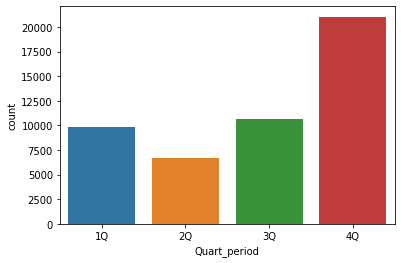

In [34]:
ax = sns.countplot(x="Quart_period", data=com_data2017)

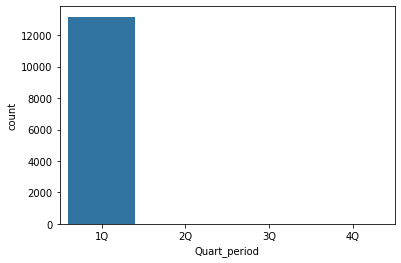

In [35]:
ax = sns.countplot(x="Quart_period", data=com_data2018)

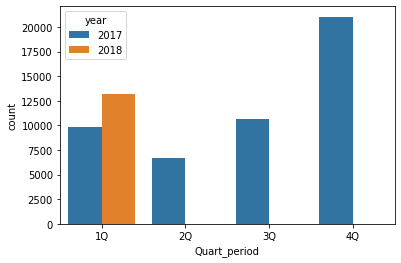

In [36]:
ax = sns.countplot(x="Quart_period", hue='year', data=combd_data)

#### **generate columns for revenues and discounts**

In [38]:
combd_data = combd_data.assign(true_rev = combd_data['price'] * combd_data['qty'],
                               sale_rev = combd_data['unit_price'] * combd_data['qty'],
                               pricedisc_rev = combd_data['price_diff'] * combd_data['qty'])
combd_data

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,disc_perc,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,22.134776,other,other,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,17.254902,other,other,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,18.887640,macbooks,other,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,20.037706,other,other,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,20.898818,other,other,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,...,33.893557,other,other,2018-03-14 11:56:00,2018,3,1Q,24.99,16.52,8.47
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,adapters_cables,other,2018-03-14 11:50:00,2018,3,1Q,50.00,19.98,30.02
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,adapters_cables,other,2018-03-14 11:51:00,2018,3,1Q,50.00,19.98,30.02
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,adapters_cables,other,2018-03-14 11:58:00,2018,3,1Q,75.00,29.97,45.03


In [39]:
combd_data.unit_price.describe()

count    61322.000000
mean       237.675733
std        495.731161
min          0.010000
25%         28.990000
50%         69.990000
75%        185.027500
max       8287.800000
Name: unit_price, dtype: float64

In [40]:
combd_data.price.describe()

count    61322.000000
mean       274.728788
std        556.462008
min          2.990000
25%         39.950000
50%         89.990000
75%        219.990000
max       9799.000000
Name: price, dtype: float64

#### **create categories for the prices**

##### product price category description
###### very expensive: 5000 - 10000; v_exp
###### expensive: 1000 - 4999; exp
###### moderately expensive: 500 - 999; m_exp
###### affordable: 150 - 499; aff
###### cheap: 20 - 149; cheap
###### very cheap: 0 - 19; v_cheap

In [41]:
combd_data['price_categ'] = pd.cut(combd_data['price'], bins=[0, 20, 150, 500, 1000, 10000], \
                                       labels=['v_cheap', 'cheap', 'aff', 'm_exp', 'exp'], right=False)
combd_data.head()

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,price_categ
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,other,other,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50,cheap
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,other,other,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96,cheap
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,macbooks,other,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81,cheap
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,other,other,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01,exp
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,other,other,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09,cheap


#### **generate price category aggregates**

In [151]:
price_categ_agg = (
                    combd_data.groupby(['year','Quart_period', 'price_categ'])
                              .agg({'true_rev':'sum', 'sale_rev':'sum', 'pricedisc_rev':'sum', 'qty':'sum'})
                              .reset_index()
                   )
price_categ_agg.head()

,year,Quart_period,price_categ,true_rev,sale_rev,pricedisc_rev,qty
0,2017,1Q,v_cheap,19602.98726,15123.77,4479.21726,1369
1,2017,1Q,cheap,465630.97718,355327.83,110303.14718,7138
2,2017,1Q,aff,473611.32544,397357.13,76254.19544,1819
3,2017,1Q,m_exp,282022.75680,259722.64,22300.11680,415
4,2017,1Q,exp,944174.67000,837594.05,106580.62000,403


In [152]:
price_categ_agg['YrsQtr'] = price_categ_agg.year.str[:] + '-' + price_categ_agg.Quart_period.str[:]
price_categ_agg.head(10)

,year,Quart_period,price_categ,true_rev,sale_rev,pricedisc_rev,qty,YrsQtr
0,2017,1Q,v_cheap,19602.98726,15123.77,4479.21726,1369,2017-1Q
1,2017,1Q,cheap,465630.97718,355327.83,110303.14718,7138,2017-1Q
2,2017,1Q,aff,473611.32544,397357.13,76254.19544,1819,2017-1Q
3,2017,1Q,m_exp,282022.75680,259722.64,22300.11680,415,2017-1Q
4,2017,1Q,exp,944174.67000,837594.05,106580.62000,403,2017-1Q
5,2017,2Q,v_cheap,12324.07923,10172.25,2151.82923,884,2017-2Q
6,2017,2Q,cheap,313857.81858,258950.90,54906.91858,4586,2017-2Q
7,2017,2Q,aff,399999.78240,353548.53,46451.25240,1425,2017-2Q
8,2017,2Q,m_exp,291507.70624,274954.26,16553.44624,431,2017-2Q
9,2017,2Q,exp,842579.27740,747379.63,95199.64740,420,2017-2Q


In [153]:
price_categ_agg['disc/prdt'] = price_categ_agg.pricedisc_rev / price_categ_agg.qty
price_categ_agg['sale_rev/prdt'] = price_categ_agg.sale_rev / price_categ_agg.qty
price_categ_agg['disc/sale'] = (price_categ_agg.pricedisc_rev / price_categ_agg.sale_rev)*100
price_categ_agg['sale/true'] = (price_categ_agg.sale_rev / price_categ_agg.true_rev)*100
price_categ_agg.head(31)

,year,Quart_period,price_categ,true_rev,sale_rev,pricedisc_rev,qty,YrsQtr,disc/prdt,sale_rev/prdt,disc/sale,sale/true
0,2017,1Q,v_cheap,1.960299e+04,15123.77,4479.21726,1369,2017-1Q,3.271890,11.047312,29.617068,77.150333
1,2017,1Q,cheap,4.656310e+05,355327.83,110303.14718,7138,2017-1Q,15.452949,49.779746,31.042642,76.311038
2,2017,1Q,aff,4.736113e+05,397357.13,76254.19544,1819,2017-1Q,41.920943,218.448120,19.190343,83.899415
3,2017,1Q,m_exp,2.820228e+05,259722.64,22300.11680,415,2017-1Q,53.735221,625.837687,8.586127,92.092795
4,2017,1Q,exp,9.441747e+05,837594.05,106580.62000,403,2017-1Q,264.468040,2078.397146,12.724615,88.711769
5,2017,2Q,v_cheap,1.232408e+04,10172.25,2151.82923,884,2017-2Q,2.434196,11.507070,21.153916,82.539635
6,2017,2Q,cheap,3.138578e+05,258950.90,54906.91858,4586,2017-2Q,11.972725,56.465526,21.203602,82.505799
7,2017,2Q,aff,3.999998e+05,353548.53,46451.25240,1425,2017-2Q,32.597370,248.104232,13.138579,88.387181
8,2017,2Q,m_exp,2.915077e+05,274954.26,16553.44624,431,2017-2Q,38.407068,637.944919,6.020436,94.321438
9,2017,2Q,exp,8.425793e+05,747379.63,95199.64740,420,2017-2Q,226.665827,1779.475310,12.737790,88.701402


#### **visualize the aggregates across price categories**

In [154]:
price_categ_agg.iloc[0:25,:]

,year,Quart_period,price_categ,true_rev,sale_rev,pricedisc_rev,qty,YrsQtr,disc/prdt,sale_rev/prdt,disc/sale,sale/true
0,2017,1Q,v_cheap,1.960299e+04,15123.77,4479.21726,1369,2017-1Q,3.271890,11.047312,29.617068,77.150333
1,2017,1Q,cheap,4.656310e+05,355327.83,110303.14718,7138,2017-1Q,15.452949,49.779746,31.042642,76.311038
2,2017,1Q,aff,4.736113e+05,397357.13,76254.19544,1819,2017-1Q,41.920943,218.448120,19.190343,83.899415
3,2017,1Q,m_exp,2.820228e+05,259722.64,22300.11680,415,2017-1Q,53.735221,625.837687,8.586127,92.092795
4,2017,1Q,exp,9.441747e+05,837594.05,106580.62000,403,2017-1Q,264.468040,2078.397146,12.724615,88.711769
5,2017,2Q,v_cheap,1.232408e+04,10172.25,2151.82923,884,2017-2Q,2.434196,11.507070,21.153916,82.539635
6,2017,2Q,cheap,3.138578e+05,258950.90,54906.91858,4586,2017-2Q,11.972725,56.465526,21.203602,82.505799
7,2017,2Q,aff,3.999998e+05,353548.53,46451.25240,1425,2017-2Q,32.597370,248.104232,13.138579,88.387181
8,2017,2Q,m_exp,2.915077e+05,274954.26,16553.44624,431,2017-2Q,38.407068,637.944919,6.020436,94.321438
9,2017,2Q,exp,8.425793e+05,747379.63,95199.64740,420,2017-2Q,226.665827,1779.475310,12.737790,88.701402


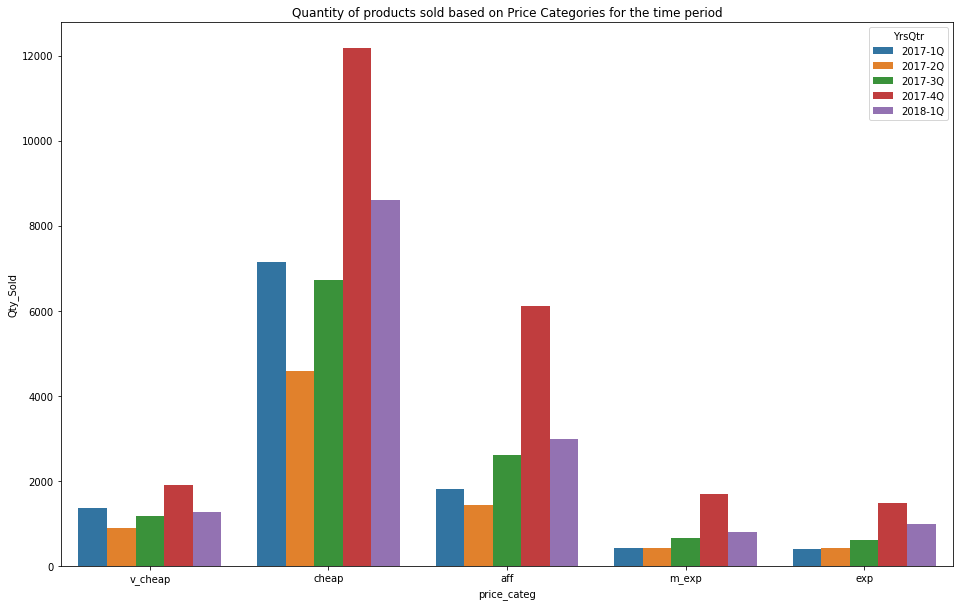

In [155]:
plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='price_categ', y='qty', hue='YrsQtr', data=price_categ_agg.iloc[0:25,:])
plt.xlabel('price_categ') # x label name
plt.ylabel('Qty_Sold') # y label name
plt.title('Quantity of products sold based on Price Categories for the time period')
plt.show()

The quantity of products sold for each price categories varies with the quarter of the year.

Cheap products have a substantial quantity sold of all the price categories.

The 4th quarter of 2017 displays the highest sale volume over all the quarters. This is proposed to be due to the special holiday seasons.

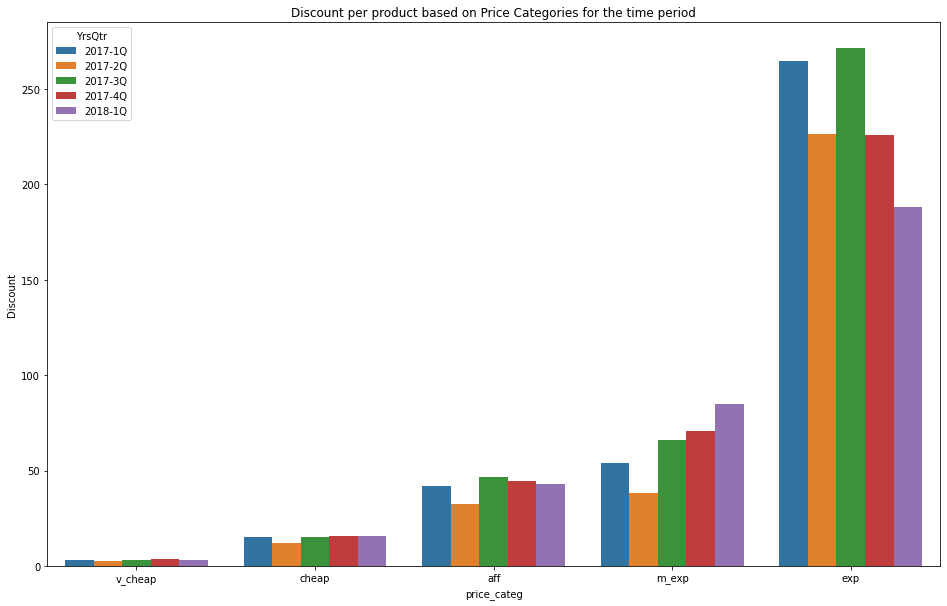

In [158]:
plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='price_categ', y='disc/prdt', hue='YrsQtr', data=price_categ_agg.iloc[0:25,:])
plt.xlabel('price_categ') # x label name
plt.ylabel('Discount') # y label name
plt.title('Discount per product based on Price Categories for the time period')
plt.show()

The plot above shows that changes in average discount per product is noticable in the price categories of moderately expensive and expensive products. 
This, therefore, drives the average discount on all the products sold in any quarter.

##### **zoom in on the cheap category**

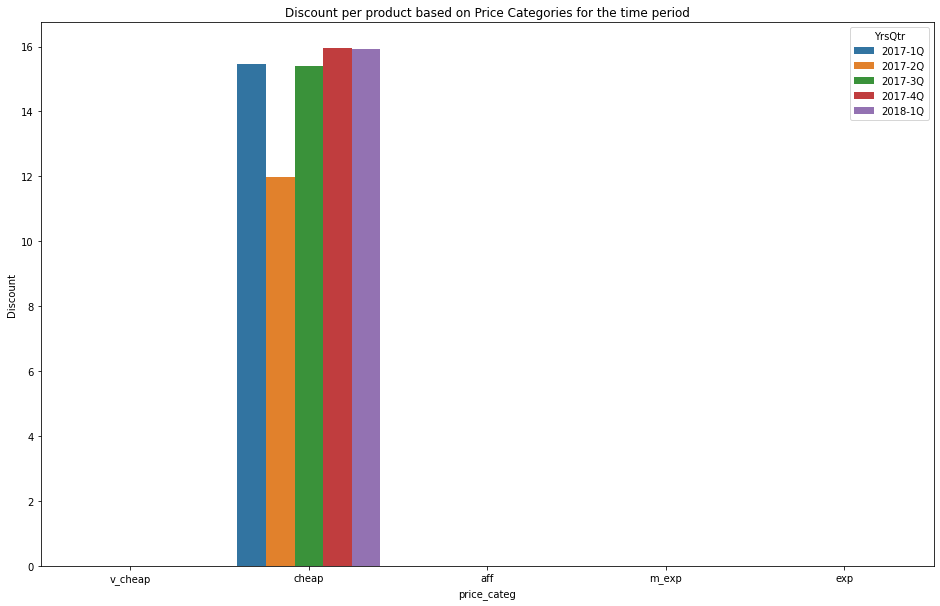

In [171]:
t = price_categ_agg.iloc[0:25,:]
plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='price_categ', y='disc/prdt', hue='YrsQtr',\
                 data=t[t.price_categ == 'cheap'])
plt.xlabel('price_categ') # x label name
plt.ylabel('Discount') # y label name
plt.title('Discount per product based on Price Categories for the time period')
plt.show()

Cheap products, which have lower discount, has a high quantity of products sold compared to higher discounted affordable product. Same for the comparison between affordable and moderately expensive. Very-cheap products are not a favoured choice of bought products. Therefore discount across price categories does not drive the quantity of products sold.

Since the discount per product of the 2017-4Q is comparable to all other quarters, it still has the highest volume of sales, therefore, this supports the special holidays' effect on sales.

Type of preferred products bought varies across quarters.

Within a price category, since we do not have a history of the sale of products without price discount, we cannot make recommendations as to the effect of price discounts. However, it may be seen from 2017-1Q and 2017-2Q, the choice of products bought does not correlate with the size of the discount (here it is assumed all discounts on products exist at the start of the time priod of interest).

The sales turnover of choice products may be affected by the discount.

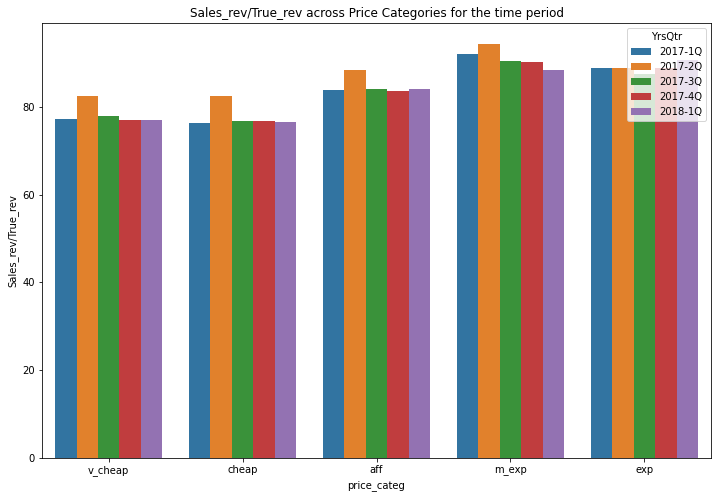

In [161]:
plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='price_categ', y='sale/true', hue='YrsQtr', data=price_categ_agg.iloc[0:25,:])
plt.xlabel('price_categ') # x label name
plt.ylabel('Sales_rev/True_rev') # y label name
plt.title('Sales_rev/True_rev across Price Categories for the time period')
plt.show()

The second quarter in 2017 which has the lowest average discount per product shows the highest Sales_rev/True_rev percentage across all price categories.

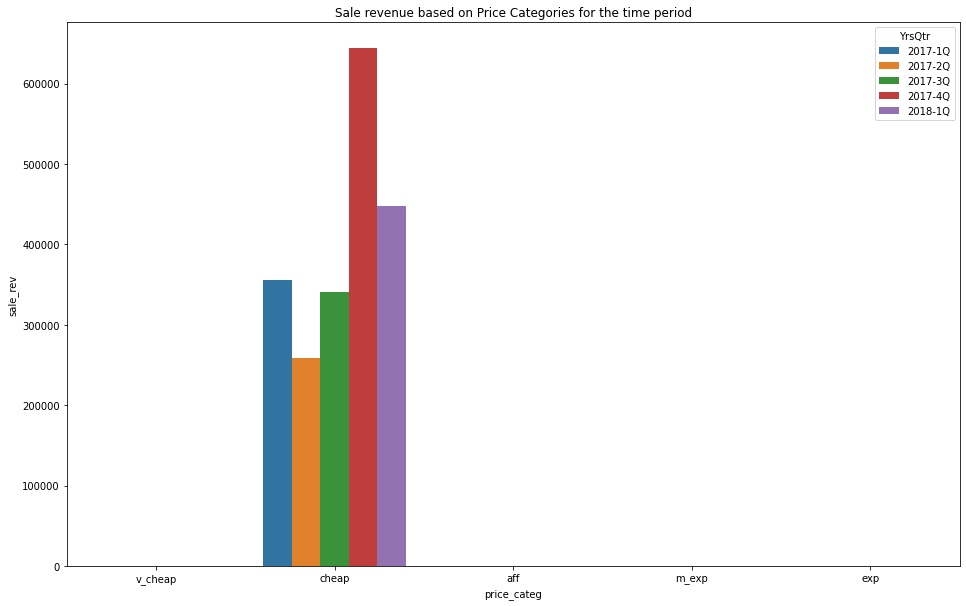

In [182]:
t = price_categ_agg.iloc[0:25,:]
plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='price_categ', y='sale_rev', hue='YrsQtr', data=t[t.price_categ == 'cheap'])
plt.xlabel('price_categ') # x label name
plt.ylabel('sale_rev') # y label name
plt.title('Sale revenue based on Price Categories for the time period')
plt.show()

Expensive, cheap, moderately expensive and affordable products are good for maintaining revenue.



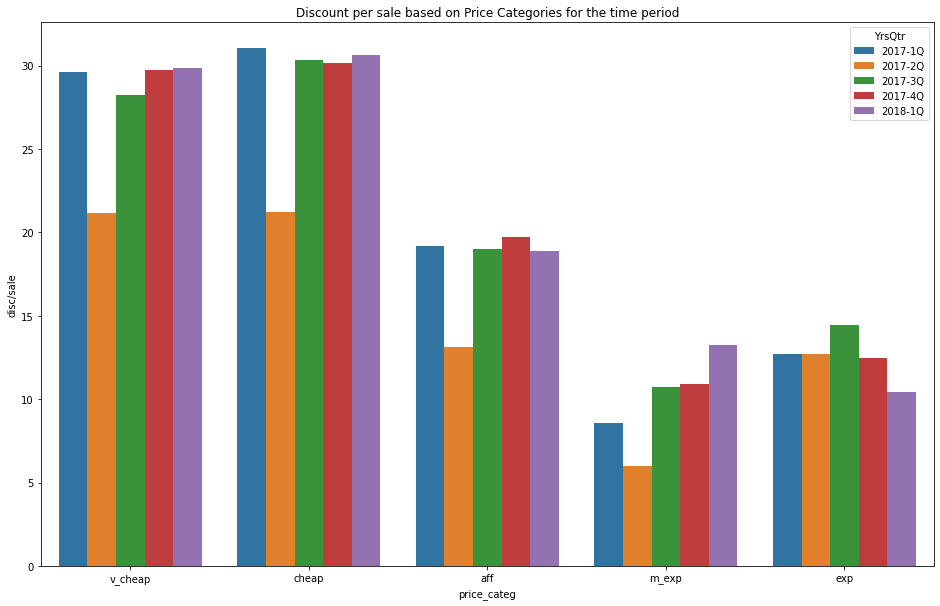

In [174]:
plt.subplots(figsize=(16, 10))
ax = sns.barplot(x='price_categ', y='disc/sale', hue='YrsQtr', data=price_categ_agg.iloc[0:25,:])
plt.xlabel('price_categ') # x label name
plt.ylabel('disc/sale') # y label name
plt.title('Discount per sale based on Price Categories for the time period')
plt.show()

Comparing between quarters in a price category of the two immediate previous plots, it can be surmised that the size of discount does not translate linearly to the sales revenue.

#### **visualize aggregates based on time period**

In [176]:
price_categ_agg.iloc[0:25,:]

,year,Quart_period,price_categ,true_rev,sale_rev,pricedisc_rev,qty,YrsQtr,disc/prdt,sale_rev/prdt,disc/sale,sale/true
0,2017,1Q,v_cheap,1.960299e+04,15123.77,4479.21726,1369,2017-1Q,3.271890,11.047312,29.617068,77.150333
1,2017,1Q,cheap,4.656310e+05,355327.83,110303.14718,7138,2017-1Q,15.452949,49.779746,31.042642,76.311038
2,2017,1Q,aff,4.736113e+05,397357.13,76254.19544,1819,2017-1Q,41.920943,218.448120,19.190343,83.899415
3,2017,1Q,m_exp,2.820228e+05,259722.64,22300.11680,415,2017-1Q,53.735221,625.837687,8.586127,92.092795
4,2017,1Q,exp,9.441747e+05,837594.05,106580.62000,403,2017-1Q,264.468040,2078.397146,12.724615,88.711769
5,2017,2Q,v_cheap,1.232408e+04,10172.25,2151.82923,884,2017-2Q,2.434196,11.507070,21.153916,82.539635
6,2017,2Q,cheap,3.138578e+05,258950.90,54906.91858,4586,2017-2Q,11.972725,56.465526,21.203602,82.505799
7,2017,2Q,aff,3.999998e+05,353548.53,46451.25240,1425,2017-2Q,32.597370,248.104232,13.138579,88.387181
8,2017,2Q,m_exp,2.915077e+05,274954.26,16553.44624,431,2017-2Q,38.407068,637.944919,6.020436,94.321438
9,2017,2Q,exp,8.425793e+05,747379.63,95199.64740,420,2017-2Q,226.665827,1779.475310,12.737790,88.701402


In [177]:
time_period_agg = (
                  price_categ_agg.iloc[0:25,:]
                                 .groupby('YrsQtr')
                                 .agg({'true_rev':'sum', 'sale_rev':'sum', 'pricedisc_rev':'sum', 'qty':'sum'})
                                 .reset_index()
                 )

time_period_agg['disc/prdt'] = time_period_agg['pricedisc_rev']/time_period_agg['qty']
time_period_agg['disc/sale'] = (time_period_agg['pricedisc_rev']/time_period_agg['sale_rev'])*100
time_period_agg['sale/true'] = (time_period_agg['sale_rev']/time_period_agg['true_rev'])*100

time_period_agg

,YrsQtr,true_rev,sale_rev,pricedisc_rev,qty,disc/prdt,disc/sale,sale/true
0,2017-1Q,2.185043e+06,1865125.42,319917.29668,11144,28.707582,17.152589,85.358762
1,2017-2Q,1.860269e+06,1645005.57,215263.09385,7746,27.790226,13.085858,88.428387
2,2017-3Q,3.013324e+06,2571656.95,441667.06946,11803,37.419899,17.174416,85.342862
3,2017-4Q,6.776079e+06,5846460.10,929618.87104,23371,39.776598,15.900542,86.280873
4,2018-1Q,3.961738e+06,3438124.11,523614.14062,14641,35.763550,15.229646,86.783222


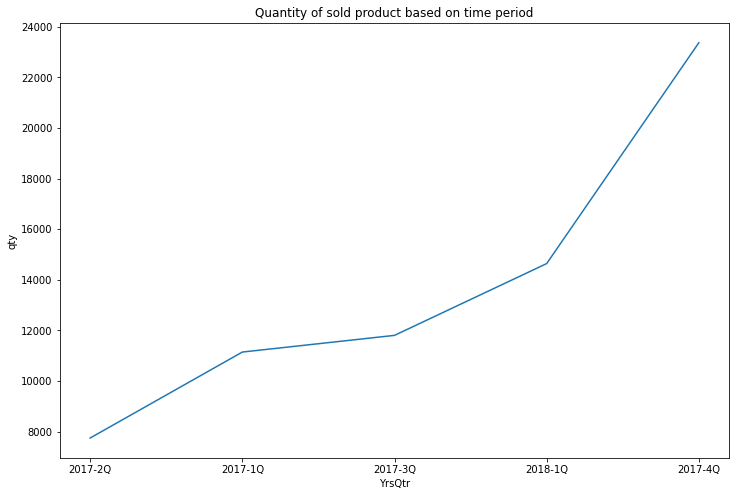

In [178]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='YrsQtr', y='qty', data=time_period_agg.sort_values(by=['qty'], ascending=True))
plt.xlabel('YrsQtr') # x label name
plt.ylabel('qty') # y label name
plt.title('Quantity of sold product based on time period')
plt.show()

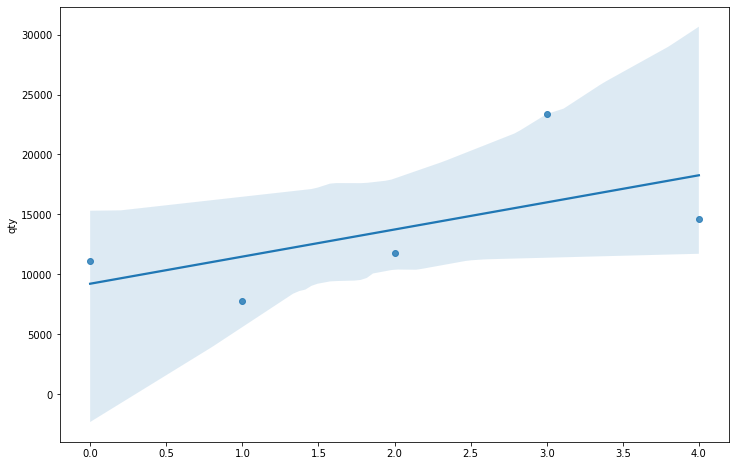

In [194]:
plt.subplots(figsize=(12, 8))
ax = sns.regplot(x=time_period_agg.index[0:5], y='qty', data=time_period_agg)  # Show the trend in quantity of products sold in the time period.

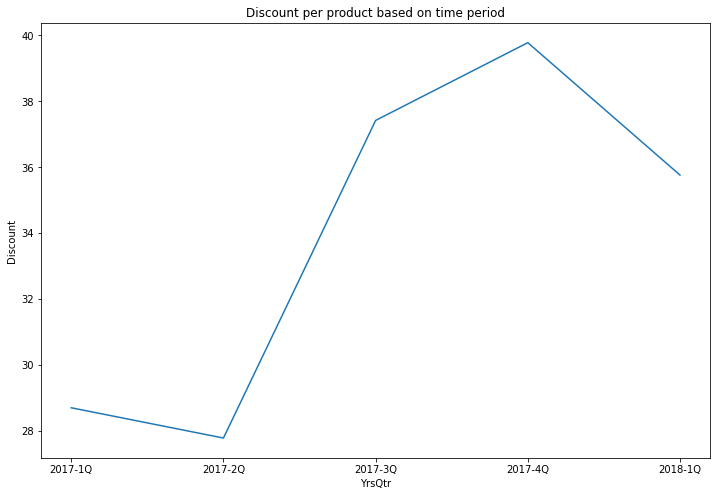

In [190]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='YrsQtr', y='disc/prdt', data=time_period_agg)#.sort_values(by=['disc/prdt'], ascending=True)
plt.xlabel('YrsQtr') # x label name
plt.ylabel('Discount') # y label name
plt.title('Discount per product based on time period')
plt.show()

While the quantity of products sold in 2017-1Q is comparably the same amount to those sold in 2017-3Q, the choice of products are different. This reflects in the discount per product.

2017-4Q and 2017-3Q show that products of choice are high discount products, and this correlates with high sales turnover. This may lead to a conclusion that sales turnover is based on discount on products, however, 2017-3Q show high discount on products but low sale turnover, particularly, a sale turnover which is comparable to 2017-1Q. Therefore, high discount should not not be associated with high sales turnover

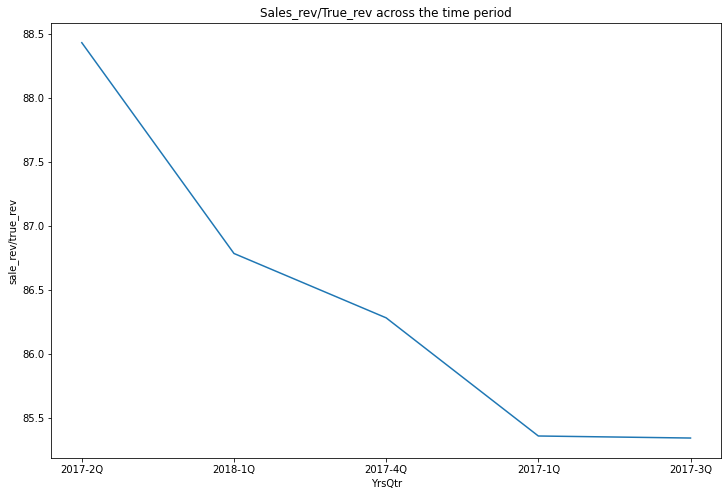

In [193]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='YrsQtr', y='sale/true', data=time_period_agg.sort_values(by=['sale/true'], ascending=False))
plt.xlabel('YrsQtr') # x label name
plt.ylabel('sale_rev/true_rev') # y label name
plt.title('Sales_rev/True_rev across the time period')
plt.show()

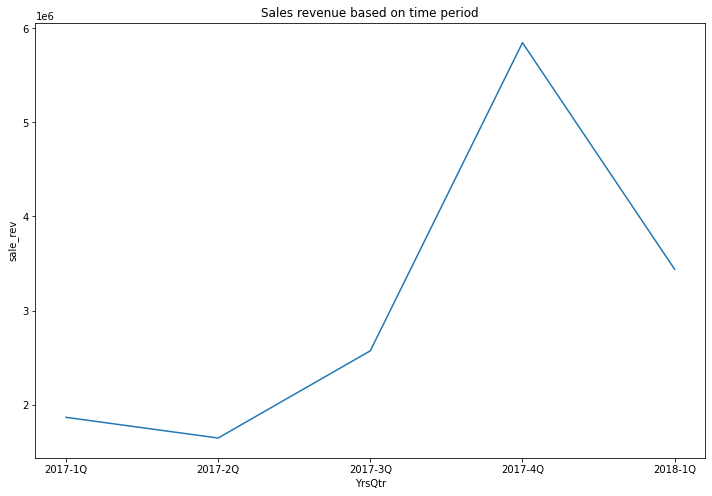

In [191]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(x='YrsQtr', y='sale_rev', data=time_period_agg)#.sort_values(by=['sale_rev'], ascending=False)
plt.xlabel('YrsQtr') # x label name
plt.ylabel('sale_rev') # y label name
plt.title('Sales revenue based on time period')
plt.show()

Comparing the discount of quarters 2017-3Q and 2017-2Q, and the sale revenue from these quarters, it can be surmised that the discount size does not linearly translate to increased sales revenue, as already identified in preceding analysis of the price categories.

The difference in sale revenue/quantity of products of 2017-4Q and 2018-1Q is larger than the difference betweeen their discount. if discount correlates to increased sales revenue, it is expected that these differences should be comparably same, however this is not so.

In [196]:
time_period_agg1 = pd.melt(time_period_agg,
                           id_vars='YrsQtr',
                           value_vars=['true_rev', 'sale_rev'],
                           value_name='revenue',
                           var_name='revenue_name'
                          )
                           
time_period_agg1                   

,YrsQtr,revenue_name,revenue
0,2017-1Q,true_rev,2.185043e+06
1,2017-2Q,true_rev,1.860269e+06
2,2017-3Q,true_rev,3.013324e+06
3,2017-4Q,true_rev,6.776079e+06
4,2018-1Q,true_rev,3.961738e+06
5,2017-1Q,sale_rev,1.865125e+06
6,2017-2Q,sale_rev,1.645006e+06
7,2017-3Q,sale_rev,2.571657e+06
8,2017-4Q,sale_rev,5.846460e+06
9,2018-1Q,sale_rev,3.438124e+06


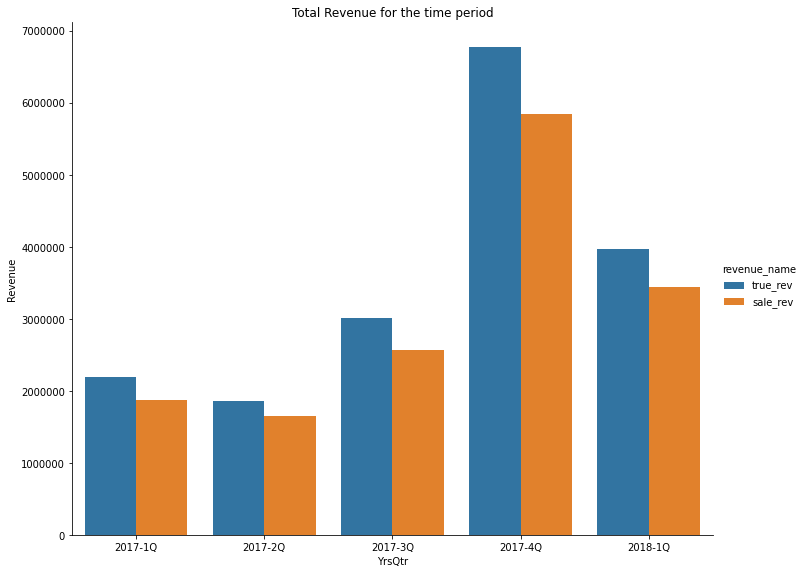

In [197]:
sns.catplot(x='YrsQtr', y='revenue', kind='bar', hue='revenue_name', height=8, aspect = 1.2, data=time_period_agg1)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('YrsQtr') # x label name
plt.ylabel('Revenue') # y label name
plt.title('Total Revenue for the time period')
plt.show()

#### **Analyse the original data based on discounts**

In [198]:
sum(combd_data_agg.qty)

68705

In [199]:
sum(combd_data[combd_data['price_diff'] == 0].qty)

2797

In [200]:
sum(combd_data[combd_data['price_diff'] > 0].qty)

63884

In [201]:
sum(combd_data[combd_data['price_diff'] < 0].qty)

2024

In [202]:
combd_data[combd_data['price_diff'] == 0]

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,price_categ
96,299947,APP1482,1,549.00,549.00,549.00,Apple iPhone 64GB Silver,01/01/2017 20:36,Apple,New iPhone SE with 4-inch screen 64 free GB.,...,iphones,other,2017-01-01 20:36:00,2017,1,1Q,549.00,549.00,0.0,m_exp
100,299968,ADN0019,1,7.99,7.99,7.99,Adonit Jot Pro Disc Replacement Flip mini and ...,03/01/2017 12:19,Adonit,Disc replacement rubber pointers Flip mini Ado...,...,other,other,2017-01-03 12:19:00,2017,1,1Q,7.99,7.99,0.0,v_cheap
121,300046,APP0482,1,35.00,35.00,35.00,Adapter Apple Lightning to SD Card Reader,02/01/2017 20:01,Apple,Lightning connector adapter to SD card reader ...,...,adapters_cables,other,2017-01-02 20:01:00,2017,1,1Q,35.00,35.00,0.0,cheap
142,300123,IFX0024,1,49.99,49.99,49.99,iFixit Complete kit Display Screen Change 4 Bl...,02/01/2017 00:04,iFixit,Replacement Kit tools for iPhone 4.,...,other,other,2017-01-02 00:04:00,2017,1,1Q,49.99,49.99,0.0,cheap
150,300158,APP1675,2,35.00,70.00,35.00,Apple EarPods headphones with Lightning connector,02/01/2017 00:36,Apple,Lightning headphone connector microphone and r...,...,airpodsearpods,other,2017-01-02 00:36:00,2017,1,1Q,70.00,70.00,0.0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61241,526529,APP1685,1,9.00,9.00,9.00,Adapter Apple Lightning to headphone jack 3.5 ...,13/03/2018 16:56,Apple,Lightning adapter for headphones or earphones ...,...,adapters_cables,other,2018-03-13 16:56:00,2018,3,1Q,9.00,9.00,0.0,v_cheap
61242,526529,APP1194,1,35.00,35.00,35.00,Magnetic charging cable for Apple Watch (1m),13/03/2018 16:56,Apple,Magnetic Cable for Apple Watch load.,...,applewatches,other,2018-03-13 16:56:00,2018,3,1Q,35.00,35.00,0.0,cheap
61244,526537,MAT0010,1,69.99,69.99,69.99,Matias numeric keyboard + Spanish Aluminio Plata,13/03/2018 17:05,Matias,Keyboard cable compatible with Mac features,...,other,other,2018-03-13 17:05:00,2018,3,1Q,69.99,69.99,0.0,cheap
61254,526615,MAT0010,1,69.99,69.99,69.99,Matias numeric keyboard + Spanish Aluminio Plata,13/03/2018 19:41,Matias,Keyboard cable compatible with Mac features,...,other,other,2018-03-13 19:41:00,2018,3,1Q,69.99,69.99,0.0,cheap


#### **Discounted Products**

In [203]:
disc = combd_data[combd_data['price_diff'] > 0] # discounted products
disc

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,price_categ
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,other,other,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50,cheap
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,other,other,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96,cheap
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,macbooks,other,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81,cheap
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,other,other,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01,exp
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,other,other,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,...,other,other,2018-03-14 11:56:00,2018,3,1Q,24.99,16.52,8.47,cheap
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,adapters_cables,other,2018-03-14 11:50:00,2018,3,1Q,50.00,19.98,30.02,cheap
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,adapters_cables,other,2018-03-14 11:51:00,2018,3,1Q,50.00,19.98,30.02,cheap
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,adapters_cables,other,2018-03-14 11:58:00,2018,3,1Q,75.00,29.97,45.03,cheap


In [204]:
disc_plot = disc.groupby(['year', 'Quart_period'])\
                .agg({'true_rev': 'sum', 'sale_rev':'sum', 'pricedisc_rev':'sum', 'qty':'sum'})\
                .reset_index()

disc_plot['disc/prdt'] = disc_plot['pricedisc_rev']/disc_plot['qty']
disc_plot

,year,Quart_period,true_rev,sale_rev,pricedisc_rev,qty,disc/prdt
0,2017,1Q,2.028471e+06,1694984.80,333486.36688,10091,33.047901
1,2017,2Q,1.695718e+06,1467607.66,228110.66765,6858,33.261981
2,2017,3Q,2.864843e+06,2414943.78,449899.46732,10875,41.370066
3,2017,4Q,6.612742e+06,5680924.48,931817.23344,22454,41.498942
4,2018,1Q,3.867501e+06,3342822.86,524678.54710,13606,38.562292
5,2018,2Q,0.000000e+00,0.00,0.00000,0,NaN
6,2018,3Q,0.000000e+00,0.00,0.00000,0,NaN
7,2018,4Q,0.000000e+00,0.00,0.00000,0,NaN


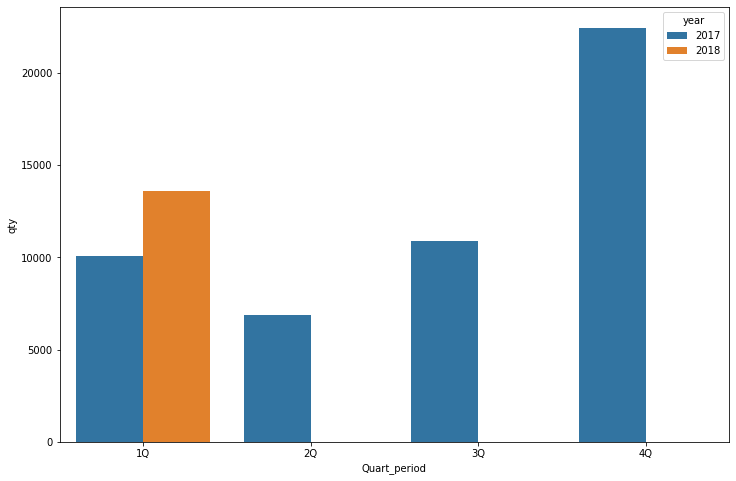

In [209]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Quart_period", y='qty', hue='year', data=disc_plot)
plt.show();

#### **Shipped Products**

In [210]:
ship = combd_data[combd_data['price_diff'] < 0]  # shipped cost included
ship

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,price_categ
54,299776,BNQ0053,1,398.99,398.99,337.00000,"PD2700Q Monitor Benq 27 ""QHD 10bit HDMI pivotable",01/01/2017 16:49,BenQ,2K monitor 27 for design professionals sRGB 10...,...,other,other,2017-01-01 16:49:00,2017,1,1Q,337.00000,398.99,-61.99000,aff
65,299829,LAC0171,1,275.49,275.49,249.99000,LaCie Porsche Design Desktop Drive 8TB USB 3.0...,01/01/2017 18:00,LaCie,External Hard Drive 8TB 35-inch USB 3.0 for Ma...,...,other,other,2017-01-01 18:00:00,2017,1,1Q,249.99000,275.49,-25.50000,aff
89,299909,LAC0159,1,176.69,176.69,174.99000,LaCie Porsche Design Desktop Drive 5TB USB 3.0...,01/01/2017 20:08,LaCie,External Hard Drive 5TB 35-inch USB 3.0 for Ma...,...,other,other,2017-01-01 20:08:00,2017,1,1Q,174.99000,176.69,-1.70000,aff
98,299959,IFX0079,2,5.99,11.98,5.95000,iFixit part adhesive strips Battery iPhone 6 / 6S,01/01/2017 21:06,iFixit,adhesive strips replacement battery for iPhone...,...,other,other,2017-01-01 21:06:00,2017,1,1Q,11.90000,11.98,-0.08000,v_cheap
116,300035,APP1641,1,909.00,909.00,779.00000,Apple iPhone 7 Plus 32GB Silver,01/01/2017 22:22,Apple,New Apple iPhone 32GB 7 plus free Plata,...,iphones,other,2017-01-01 22:22:00,2017,1,1Q,779.00000,909.00,-130.00000,m_exp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60619,523397,UBI0007,1,359.99,359.99,359.98952,Ubiquiti Amplifi Wi-Fi Mesh Router + 2 Mesh Ac...,08/03/2018 17:48,Ubiquity,Wi-Fi high-density intelligent Mesh technology,...,other,other,2018-03-08 17:48:00,2018,3,1Q,359.98952,359.99,-0.00048,aff
60663,523627,NOM0021,1,39.99,39.99,39.95000,Nomad 8/7 Leather Case iPhone Case Brown,09/03/2018 09:28,Nomad,Leather case high quality microfiber interior ...,...,other,other,2018-03-09 09:28:00,2018,3,1Q,39.95000,39.99,-0.04000,cheap
60729,523776,PAC2428,1,636.99,636.99,636.98000,Synology DS918 + NAS Server | 8GB RAM,09/03/2018 12:53,Pack,NAS server of the Plus Series for companies se...,...,other,other,2018-03-09 12:53:00,2018,3,1Q,636.98000,636.99,-0.01000,m_exp
60852,524782,SAN0146,1,15.00,15.00,13.99000,Pendrive 16GB SanDisk Ultra Dual USB-C / USB,10/03/2018 11:43,SanDisk,16GB flash drive with two different USB-C and ...,...,other,other,2018-03-10 11:43:00,2018,3,1Q,13.99000,15.00,-1.01000,v_cheap


In [211]:
ship_plot = ship.groupby(['year', 'Quart_period'])\
                .agg({'true_rev': 'sum', 'sale_rev':'sum', 'pricedisc_rev':'sum', 'qty':'sum'})\
                .reset_index()

ship_plot['disc/prdt'] = ship_plot['pricedisc_rev']/ship_plot['qty']
ship_plot

,year,Quart_period,true_rev,sale_rev,pricedisc_rev,qty,disc/prdt
0,2017,1Q,115107.27980,128676.35,-13569.07020,579,-23.435354
1,2017,2Q,112418.44620,125266.02,-12847.57380,441,-29.132820
2,2017,3Q,93563.46214,101795.86,-8232.39786,426,-19.324878
3,2017,4Q,44525.39760,46723.76,-2198.36240,305,-7.207746
4,2018,1Q,24797.01352,25861.42,-1064.40648,273,-3.898925
5,2018,2Q,0.00000,0.00,0.00000,0,NaN
6,2018,3Q,0.00000,0.00,0.00000,0,NaN
7,2018,4Q,0.00000,0.00,0.00000,0,NaN


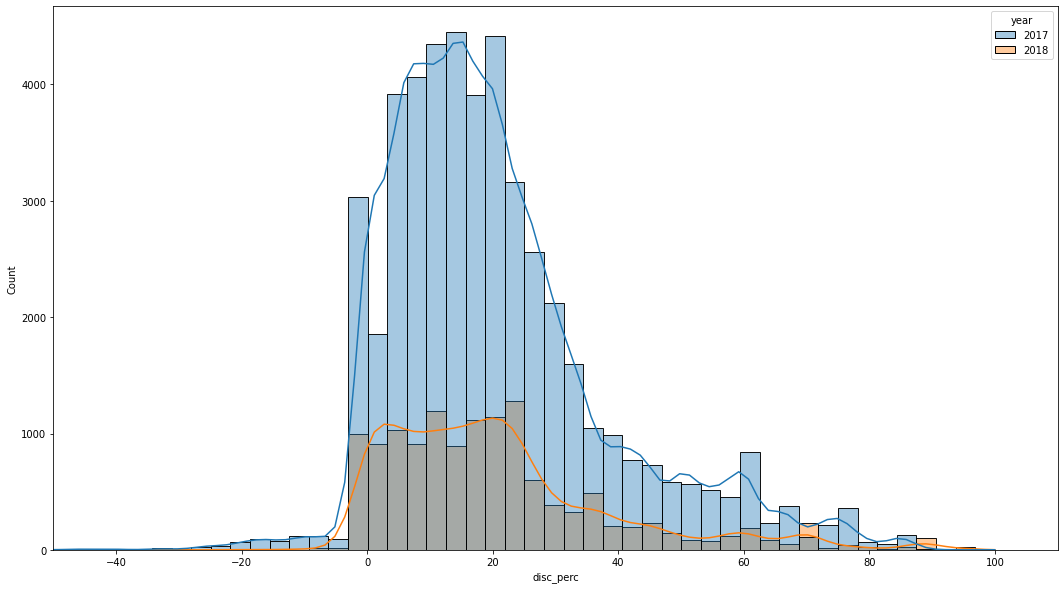

In [212]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=combd_data, x='disc_perc', hue='year', 
             alpha=.4, # add transparency to you chart/legend
             kde=True, # add a density line in the histogram
             bins=100 # define the number of bins the variable total paid will be grouped
            );
plt.xlim(-50, 110);

Most products are discounted. Only for a few is there a sale price higher than the true price.

## **Products Categories Data**

#### **Import and Prepare Data**

In [215]:
prdt_categ = pd.read_csv('orders_final.csv')

In [216]:
prdt_categ

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,in_stock,price_diff,disc_perc,category,subcategory
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,1,13.50,22.134776,accessories,computer_parts
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,0,3.96,17.254902,accessories,iphone_support
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,1,16.81,18.887640,accessories,apple_macbook_charging
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,0,643.01,20.037706,devices,apple_macbooks
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,0,16.09,20.898818,accessories,computer_parts_memory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,0,8.47,33.893557,accessories,cases
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,accessories,apple_adapters_cables
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,accessories,apple_adapters_cables
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,1,15.01,60.040000,accessories,apple_adapters_cables


In [217]:
prdt_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61322 entries, 0 to 61321
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     61322 non-null  int64  
 1   sku          61322 non-null  object 
 2   qty          61322 non-null  int64  
 3   unit_price   61322 non-null  float64
 4   total_price  61322 non-null  float64
 5   price        61322 non-null  float64
 6   name         61322 non-null  object 
 7   order_date   61322 non-null  object 
 8   brand        61322 non-null  object 
 9   desc         61322 non-null  object 
 10  in_stock     61322 non-null  int64  
 11  price_diff   61322 non-null  float64
 12  disc_perc    61322 non-null  float64
 13  category     61322 non-null  object 
 14  subcategory  61322 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 7.0+ MB


In [218]:
list(prdt_categ.category.unique())

['accessories',
 'devices',
 'other',
 'service',
 'tools',
 'spare_parts',
 'spare-parts']

#### **extract datetime data**

In [219]:
prdt_categ['date'] = pd.to_datetime(prdt_categ.order_date, format='%d/%m/%Y %H:%M')

In [220]:
prdt_categ = prdt_categ.assign(year = prdt_categ.date.dt.strftime('%Y'),
                               month = prdt_categ.date.dt.strftime('%m'))

In [221]:
prdt_categ['month'] = prdt_categ.month.astype(int)

#### **create time_period categories**

In [222]:
prdt_categ['Quart_period'] = pd.cut(prdt_categ.month, bins=[1, 4, 7, 10, 13], labels=['1Q', '2Q', '3Q', '4Q'], right=False)

In [223]:
prdt_categ = prdt_categ.assign(true_rev = prdt_categ['price'] * prdt_categ['qty'],
                               sale_rev = prdt_categ['unit_price'] * prdt_categ['qty'],
                               pricedisc_rev = prdt_categ['price_diff'] * prdt_categ['qty'])
prdt_categ

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,disc_perc,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,22.134776,accessories,computer_parts,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,17.254902,accessories,iphone_support,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,18.887640,accessories,apple_macbook_charging,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,20.037706,devices,apple_macbooks,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,20.898818,accessories,computer_parts_memory,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,...,33.893557,accessories,cases,2018-03-14 11:56:00,2018,3,1Q,24.99,16.52,8.47
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,accessories,apple_adapters_cables,2018-03-14 11:50:00,2018,3,1Q,50.00,19.98,30.02
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,accessories,apple_adapters_cables,2018-03-14 11:51:00,2018,3,1Q,50.00,19.98,30.02
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,60.040000,accessories,apple_adapters_cables,2018-03-14 11:58:00,2018,3,1Q,75.00,29.97,45.03


In [224]:
prdt_categ['YrsQtr'] = prdt_categ.year.str[:] + '-' + prdt_categ.Quart_period.str[:]
prdt_categ.head(10)

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,category,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,YrsQtr
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,accessories,computer_parts,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50,2017-1Q
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,accessories,iphone_support,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96,2017-1Q
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,accessories,apple_macbook_charging,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81,2017-1Q
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,devices,apple_macbooks,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01,2017-1Q
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,accessories,computer_parts_memory,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09,2017-1Q
5,299561,PEB0015,1,142.49,142.49,299.99,Pebble Smartwatch Time Steel Black,01/01/2017 02:39,Pebble,Bluetooth Smart Watch with steel case leather ...,...,other,other,2017-01-01 02:39:00,2017,1,1Q,299.99,142.49,157.50,2017-1Q
6,299563,BEA0065,1,256.49,256.49,299.95,Solo3 Beats Headphones Wireless On-Ear Rose Gold,01/01/2017 02:47,Beats,Bluetooth helmets integrated chip W1 40h batte...,...,accessories,headphones,2017-01-01 02:47:00,2017,1,1Q,299.95,256.49,43.46,2017-1Q
7,299564,SAT0010,1,18.99,18.99,29.99,Satechi Aluminum Silver Mouse,01/01/2017 02:50,Satechi,Aluminum mat with ultra soft non-slip surface ...,...,accessories,mouse_mat,2017-01-01 02:50:00,2017,1,1Q,29.99,18.99,11.00,2017-1Q
8,299571,SYN0139,1,166.24,166.24,175.99,Synology DS216j NAS Server Mac and PC,01/01/2017 12:07,Synology,NAS server 2 bays and 2 USB 3.0 high-speed por...,...,accessories,servers,2017-01-01 12:07:00,2017,1,1Q,175.99,166.24,9.75,2017-1Q
9,299578,LOG0191,1,142.49,142.49,209.00,Ultimate Ears Boom 2 Bluetooth Portable Speake...,01/01/2017 13:00,Logitech,Bluetooth portable speaker waterproof black co...,...,accessories,speakers,2017-01-01 13:00:00,2017,1,1Q,209.00,142.49,66.51,2017-1Q


In [225]:
prdt_categ['price_categ'] = pd.cut(prdt_categ['price'], bins=[0, 20, 150, 500, 1000, 10000], \
                                       labels=['v_cheap', 'cheap', 'aff', 'm_exp', 'exp'], right=False)
prdt_categ.head()

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,YrsQtr,price_categ
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,computer_parts,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50,2017-1Q,cheap
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,iphone_support,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96,2017-1Q,cheap
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,apple_macbook_charging,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81,2017-1Q,cheap
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,apple_macbooks,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01,2017-1Q,exp
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,computer_parts_memory,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09,2017-1Q,cheap


In [226]:
prdt_categ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61322 entries, 0 to 61321
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       61322 non-null  int64         
 1   sku            61322 non-null  object        
 2   qty            61322 non-null  int64         
 3   unit_price     61322 non-null  float64       
 4   total_price    61322 non-null  float64       
 5   price          61322 non-null  float64       
 6   name           61322 non-null  object        
 7   order_date     61322 non-null  object        
 8   brand          61322 non-null  object        
 9   desc           61322 non-null  object        
 10  in_stock       61322 non-null  int64         
 11  price_diff     61322 non-null  float64       
 12  disc_perc      61322 non-null  float64       
 13  category       61322 non-null  object        
 14  subcategory    61322 non-null  object        
 15  date           6132

In [232]:
prdt_categ_agg = (prdt_categ.groupby(['year', 'Quart_period', 'category'])
                            .agg({'qty':'sum', 'true_rev':'sum', 'sale_rev':'sum', 'pricedisc_rev':'sum'})
                            .reset_index()
                 )

prdt_categ_agg.head(31)

,year,Quart_period,category,qty,true_rev,sale_rev,pricedisc_rev
0,2017,1Q,accessories,8215,9.772397e+05,802993.16,174246.51614
1,2017,1Q,devices,593,1.003538e+06,902335.63,101202.26094
2,2017,1Q,other,1398,1.484969e+05,115070.15,33426.74100
3,2017,1Q,service,190,1.938465e+04,15769.24,3615.40580
4,2017,1Q,spare-parts,94,1.604900e+03,1373.51,231.39000
5,2017,1Q,spare_parts,409,2.892787e+04,22790.17,6137.70280
6,2017,1Q,tools,245,5.850840e+03,4793.56,1057.28000
7,2017,2Q,accessories,5584,8.011406e+05,695232.02,105908.55317
8,2017,2Q,devices,728,9.204903e+05,831993.21,88497.05245
9,2017,2Q,other,915,1.056031e+05,89569.17,16033.97140


In [233]:
prdt_categ_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           56 non-null     object  
 1   Quart_period   56 non-null     category
 2   category       56 non-null     object  
 3   qty            56 non-null     int64   
 4   true_rev       56 non-null     float64 
 5   sale_rev       56 non-null     float64 
 6   pricedisc_rev  56 non-null     float64 
dtypes: category(1), float64(3), int64(1), object(2)
memory usage: 3.0+ KB


In [234]:
prdt_categ_agg['YrsQtr'] = prdt_categ_agg.year.str[:] + '-' + prdt_categ_agg.Quart_period.str[:]
prdt_categ_agg['disc/prdt'] = prdt_categ_agg['pricedisc_rev']/prdt_categ_agg['qty']
prdt_categ_agg.head(31)

,year,Quart_period,category,qty,true_rev,sale_rev,pricedisc_rev,YrsQtr,disc/prdt
0,2017,1Q,accessories,8215,9.772397e+05,802993.16,174246.51614,2017-1Q,21.210775
1,2017,1Q,devices,593,1.003538e+06,902335.63,101202.26094,2017-1Q,170.661486
2,2017,1Q,other,1398,1.484969e+05,115070.15,33426.74100,2017-1Q,23.910401
3,2017,1Q,service,190,1.938465e+04,15769.24,3615.40580,2017-1Q,19.028452
4,2017,1Q,spare-parts,94,1.604900e+03,1373.51,231.39000,2017-1Q,2.461596
5,2017,1Q,spare_parts,409,2.892787e+04,22790.17,6137.70280,2017-1Q,15.006608
6,2017,1Q,tools,245,5.850840e+03,4793.56,1057.28000,2017-1Q,4.315429
7,2017,2Q,accessories,5584,8.011406e+05,695232.02,105908.55317,2017-2Q,18.966431
8,2017,2Q,devices,728,9.204903e+05,831993.21,88497.05245,2017-2Q,121.561885
9,2017,2Q,other,915,1.056031e+05,89569.17,16033.97140,2017-2Q,17.523466


In [230]:
prdt_categ_plot = pd.melt(
                          frame=prdt_categ_agg.iloc[0:30,:], 
                          id_vars=['YrsQtr', 'category'],
                          value_vars=['sale_rev'], 
                          value_name='revenue',
                          var_name='revenue_name'
                          )
prdt_categ_plot

,YrsQtr,category,revenue_name,revenue
0,2017-1Q,accessories,sale_rev,802993.16
1,2017-1Q,devices,sale_rev,902335.63
2,2017-1Q,other,sale_rev,115070.15
3,2017-1Q,service,sale_rev,15769.24
4,2017-1Q,spare-parts,sale_rev,1373.51
5,2017-1Q,spare_parts,sale_rev,22790.17
6,2017-1Q,tools,sale_rev,4793.56
7,2017-2Q,accessories,sale_rev,695232.02
8,2017-2Q,devices,sale_rev,831993.21
9,2017-2Q,other,sale_rev,89569.17


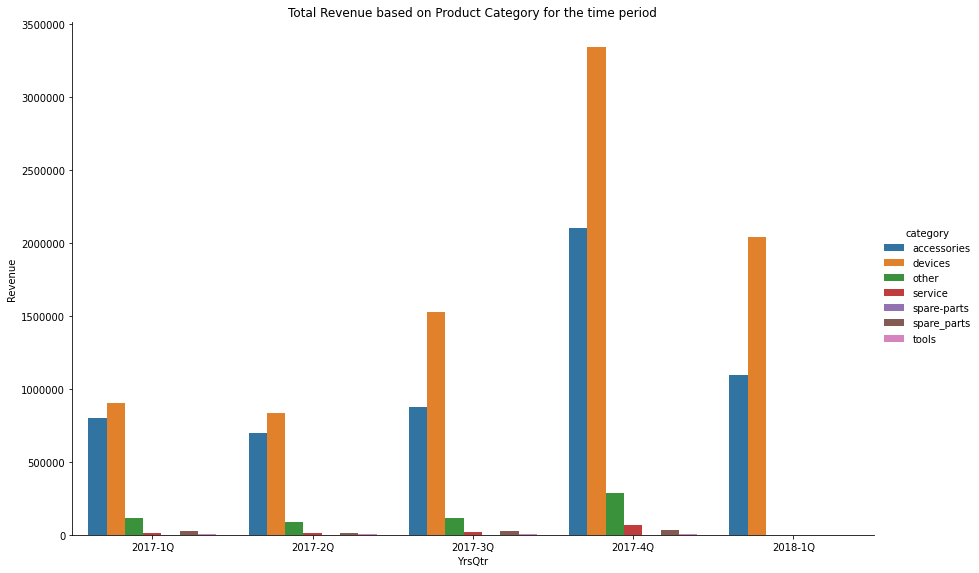

In [231]:
ax = sns.catplot(x='YrsQtr', y='revenue', hue='category', kind='bar', height = 8, aspect=1.5, data=prdt_categ_plot)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('YrsQtr') # x label name
plt.ylabel('Revenue') # y label name
plt.title('Total Revenue based on Product Category for the time period')
plt.show()

Most revenues come from sale of accessories and devices.

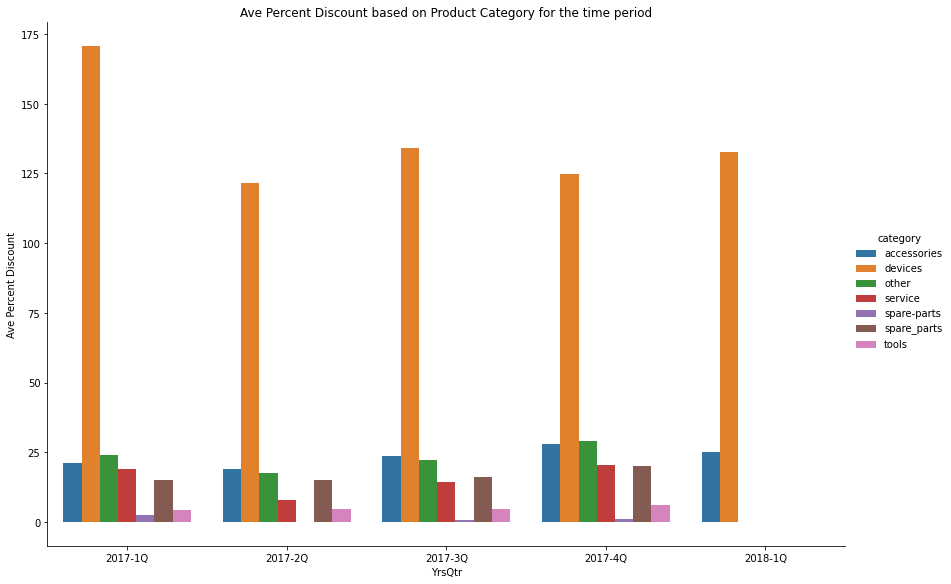

In [235]:
ax = sns.catplot(x='YrsQtr', y='disc/prdt', hue='category', kind='bar', height = 8, aspect=1.5, data=prdt_categ_agg.iloc[0:30,0:9])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('YrsQtr') # x label name
plt.ylabel('Ave Percent Discount') # y label name
plt.title('Ave Percent Discount based on Product Category for the time period')
plt.show()

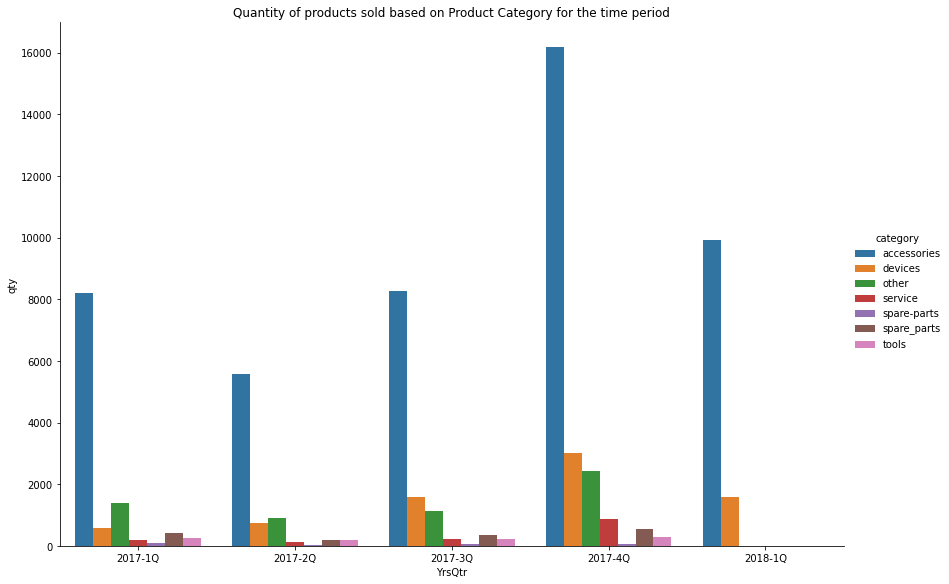

In [236]:
ax = sns.catplot(x='YrsQtr', y='qty', hue='category', kind='bar', height = 8, aspect=1.5, data=prdt_categ_agg.iloc[0:30,0:9])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('YrsQtr') # x label name
plt.ylabel('qty') # y label name
plt.title('Quantity of products sold based on Product Category for the time period')
plt.show()

In [237]:
prdt_categ1 = prdt_categ[prdt_categ['category'] == 'accessories']
prdt_categ1

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,YrsQtr,price_categ
0,299545,OWC0100,1,47.49,47.49,60.99,OWC In-line Digital Temperature Sensor Kit HDD...,01/01/2017 01:51,OWC,Kit temperature sensor for HDD iMac 21 inch an...,...,computer_parts,2017-01-01 01:51:00,2017,1,1Q,60.99,47.49,13.50,2017-1Q,cheap
1,299546,IOT0014,1,18.99,18.99,22.95,iOttie Easy View 2 Car Black Support,01/01/2017 01:57,iOttie,IPhone car holder 7 plus / 7/6 Plus / 6 / 5s /...,...,iphone_support,2017-01-01 01:57:00,2017,1,1Q,22.95,18.99,3.96,2017-1Q,cheap
2,295347,APP0700,1,72.19,72.19,89.00,Apple 85W MagSafe 2 charger MacBook Pro screen...,01/01/2017 02:02,Apple,Apple MagSafe 2 Charger for MacBook Pro 15-inc...,...,apple_macbook_charging,2017-01-01 02:02:00,2017,1,1Q,89.00,72.19,16.81,2017-1Q,cheap
4,299556,CRU0039-A,1,60.90,60.90,76.99,(Open) Crucial 240GB SSD 7mm BX200,01/01/2017 02:30,Crucial,SSD hard drive and high-speed performance with...,...,computer_parts_memory,2017-01-01 02:30:00,2017,1,1Q,76.99,60.90,16.09,2017-1Q,cheap
6,299563,BEA0065,1,256.49,256.49,299.95,Solo3 Beats Headphones Wireless On-Ear Rose Gold,01/01/2017 02:47,Beats,Bluetooth helmets integrated chip W1 40h batte...,...,headphones,2017-01-01 02:47:00,2017,1,1Q,299.95,256.49,43.46,2017-1Q,aff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61317,525664,TUC0207,1,16.52,16.52,24.99,Tucano Elements Second Skin Macbook Sleeve 12 ...,14/03/2018 11:56,Tucano,velvety inner protective case for MacBook 12 i...,...,cases,2018-03-14 11:56:00,2018,3,1Q,24.99,16.52,8.47,2018-1Q,cheap
61318,527070,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:50,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,apple_adapters_cables,2018-03-14 11:50:00,2018,3,1Q,50.00,19.98,30.02,2018-1Q,cheap
61319,527074,APP0698,2,9.99,19.98,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:51,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,apple_adapters_cables,2018-03-14 11:51:00,2018,3,1Q,50.00,19.98,30.02,2018-1Q,cheap
61320,527096,APP0698,3,9.99,29.97,25.00,Apple Lightning Cable Connector to USB 1m Whit...,14/03/2018 11:58,Apple,Apple Lightning USB Cable 1 meter to charge an...,...,apple_adapters_cables,2018-03-14 11:58:00,2018,3,1Q,75.00,29.97,45.03,2018-1Q,cheap


In [238]:
prdt_categ2 = prdt_categ[prdt_categ['category'] == 'devices']
prdt_categ2

,order_id,sku,qty,unit_price,total_price,price,name,order_date,brand,desc,...,subcategory,date,year,month,Quart_period,true_rev,sale_rev,pricedisc_rev,YrsQtr,price_categ
3,299549,PAC0929,1,2565.99,2565.99,3209.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",02/01/2017 10:00,Pack,IMac desktop computer 27 inch Retina 5K RAM 32...,...,apple_macbooks,2017-01-02 10:00:00,2017,1,1Q,3209.00,2565.99,643.01,2017-1Q,exp
19,299600,PAC0492,1,4260.99,4260.99,5729.00,Apple Mac Pro Quad-Core 37GHz | 64 GB RAM | 1T...,01/01/2017 11:56,Pack,Apple Mac Pro Quad-Core 37GHz 64GB RAM and 1TB...,...,apple_macbooks,2017-01-01 11:56:00,2017,1,1Q,5729.00,4260.99,1468.01,2017-1Q,exp
23,298391,PAC1594,1,2769.99,2769.99,3889.00,"Apple iMac 27 ""Core i5 3.2GHz Retina 5K | 32GB...",01/01/2017 12:18,Pack,Desktop computer iMac 27-inch 3.2GHz Core i5 5...,...,apple_macbooks,2017-01-01 12:18:00,2017,1,1Q,3889.00,2769.99,1119.01,2017-1Q,exp
33,299655,WAC0040,1,35.14,35.14,39.99,Wacom Bamboo Wireless Kit / Intuos graphics ta...,01/01/2017 12:43,Wacom,Wireless Kit Wacom graphics tablets.,...,graphics_tablet,2017-01-01 12:43:00,2017,1,1Q,39.99,35.14,4.85,2017-1Q,cheap
37,299664,APP0958,1,1351.99,1351.99,1449.00,"Apple MacBook Pro Retina 13 ""i5 27 Ghz | 8GB R...",01/01/2017 20:08,Apple,New MacBook Pro 13-inch Retina screen i5 128GB...,...,apple_macbooks,2017-01-01 20:08:00,2017,1,1Q,1449.00,1351.99,97.01,2017-1Q,exp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61246,526542,WAC0251,1,94.99,94.99,99.00,Wacom Intuos Graphics Tablet S Bluetooth Black,13/03/2018 17:13,Wacom,small-edge graphics tablet with Bluetooth inte...,...,graphics_tablet,2018-03-13 17:13:00,2018,3,1Q,99.00,94.99,4.01,2018-1Q,cheap
61251,526612,APP2486,1,875.21,875.21,1089.00,Apple iPhone 8 Plus 256GB Space Gray,13/03/2018 19:32,Apple,Apple iPhone 8 Plus 256GB in Space Gray,...,apple_iphones,2018-03-13 19:32:00,2018,3,1Q,1089.00,875.21,213.79,2018-1Q,exp
61258,526648,APP2073,1,1199.00,1199.00,1355.59,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",13/03/2018 21:07,Apple,laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...,...,apple_macbooks,2018-03-13 21:07:00,2018,3,1Q,1355.59,1199.00,156.59,2018-1Q,exp
61260,526672,APP2072,1,969.00,969.00,1105.59,"Apple MacBook Air 13 ""Core i5 18GHz | 8GB RAM ...",13/03/2018 21:45,Apple,laptop MacBook Air 13 inch i5 18GHz 8GB RAM an...,...,apple_macbooks,2018-03-13 21:45:00,2018,3,1Q,1105.59,969.00,136.59,2018-1Q,exp


In [240]:
prdt_categ.category.replace(to_replace='spare-parts', value='spare_parts', inplace=True)

In [241]:
prdt_categ.subcategory.nunique()

91

In [242]:
sorted(list(prdt_categ.subcategory.unique()))

['adapters_cables',
 'apple_adapters_cables',
 'apple_airports',
 'apple_battery',
 'apple_headphones',
 'apple_headphones_airpods',
 'apple_headphones_earpods',
 'apple_ipad_cases',
 'apple_ipad_keyboards',
 'apple_ipad_pencils',
 'apple_ipads',
 'apple_iphone_battery_cases',
 'apple_iphone_cases',
 'apple_iphone_charging',
 'apple_iphones',
 'apple_ipods',
 'apple_keyboard',
 'apple_macbook_charging',
 'apple_macbooks',
 'apple_magic_keyboard',
 'apple_magic_mouse',
 'apple_magic_trackpad',
 'apple_mouse',
 'apple_superdrive',
 'applecare_warranty',
 'appletv',
 'appletv_remote',
 'applewatch',
 'applewatch_cases',
 'applewatch_charging',
 'applewatch_straps',
 'cameras',
 'cases',
 'cases_apple_devices',
 'cases_iphone',
 'charging',
 'charging_iphone',
 'computer_parts',
 'computer_parts_memory',
 'dvd',
 'external_battery',
 'flash_drive',
 'gadgets',
 'graphic_display_macbook',
 'graphics_tablet',
 'headphones',
 'headsets',
 'hub',
 'hubs',
 'installation_kit',
 'installation_re

In [243]:
len(list(prdt_categ.subcategory.unique()))

91

In [244]:
name_concat = ' '.join(sorted(list(prdt_categ.subcategory.unique())))
name_concat

'adapters_cables apple_adapters_cables apple_airports apple_battery apple_headphones apple_headphones_airpods apple_headphones_earpods apple_ipad_cases apple_ipad_keyboards apple_ipad_pencils apple_ipads apple_iphone_battery_cases apple_iphone_cases apple_iphone_charging apple_iphones apple_ipods apple_keyboard apple_macbook_charging apple_macbooks apple_magic_keyboard apple_magic_mouse apple_magic_trackpad apple_mouse apple_superdrive applecare_warranty appletv appletv_remote applewatch applewatch_cases applewatch_charging applewatch_straps cameras cases cases_apple_devices cases_iphone charging charging_iphone computer_parts computer_parts_memory dvd external_battery flash_drive gadgets graphic_display_macbook graphics_tablet headphones headsets hub hubs installation_kit installation_repair ipad_cases iphone_battery iphone_cases iphone_charger iphone_screen iphone_support keyboards lampcharge lighting macbook_battery macbook_cable macbook_cases macbook_stands macbook_support memory m

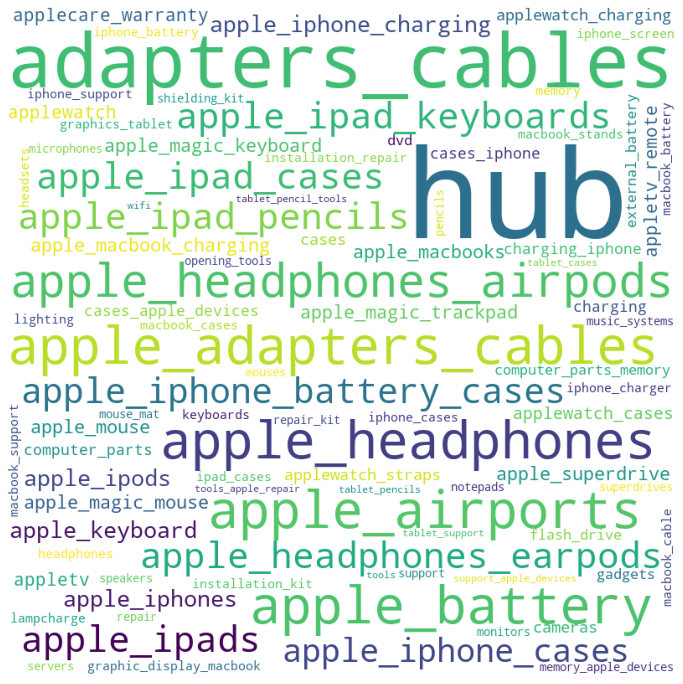

In [248]:
from wordcloud import WordCloud, STOPWORDS

word_cloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS).generate(name_concat)
plt.figure(figsize = (12, 15))
plt.imshow(word_cloud)
plt.axis("off");